In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

## L1 Regression

### $L^1$ norm (Manhattan distance)

p-norm : $\lVert x {\rVert}_p$ = $(\sum_{i=1}^n |x_i|^p)^{\frac{1}{p}}$

1-norm : $\lVert x {\rVert}_1$ = $\sum_{i=1}^n |x_i|$

### Linear Regression

The main objective for linear regression is finding the best-fit line expressed as $b = Ax+ \varepsilon$, where:

* $A$ is the matrix with $i^{th}$ row of control variables for $j^{th}$ variables
* b is the observation variables 
* $\varepsilon$ is the error

We can find the best-fit line through finding the vector x that explains the observation b and minimizes the error $\varepsilon$

Ideally, $\varepsilon = 0$, which means when we plot $Ax$ against $b$, we have a line that goes through every point.

Vanderbei, R. J. (2014). Linear Programming: Foundations and Extensions (Chapter 12).

$$
\mathbf{b} = Ax+ \varepsilon \\
\mathbf{b} = \beta_0 + \beta_1 \mathbf{x} + \varepsilon \\
\mathbf{b} = 
\begin{bmatrix}
1 & x_{11}\\
1 & x_{21} \\
\vdots & \vdots \\
1 & x_{n1}
\end{bmatrix}

\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
+ \varepsilon
$$

### Example of the format $\mathbf{b} = \mathbf{A} \mathbf{x} + \varepsilon$

Generate a matrix $\mathbf{A}, \mathbf{b}$ and plot the error, $\varepsilon$.

In [5]:
# Generate matrix A and b
N = 10 # we have 10 set of points
x = np.random.random(10)
# add column of 1's in front of the matrix to account for B0:
A = np.vander(x, N=2, increasing=True) 
b = np.random.random(10)
print(A)
print(b)

[[1.         0.68016609]
 [1.         0.95587078]
 [1.         0.02431588]
 [1.         0.11567606]
 [1.         0.72376249]
 [1.         0.73959842]
 [1.         0.26014375]
 [1.         0.38909566]
 [1.         0.59283742]
 [1.         0.66021911]]
[0.4645659  0.05049616 0.85143111 0.55902176 0.48242373 0.22104922
 0.25828698 0.92839507 0.37391613 0.16756283]


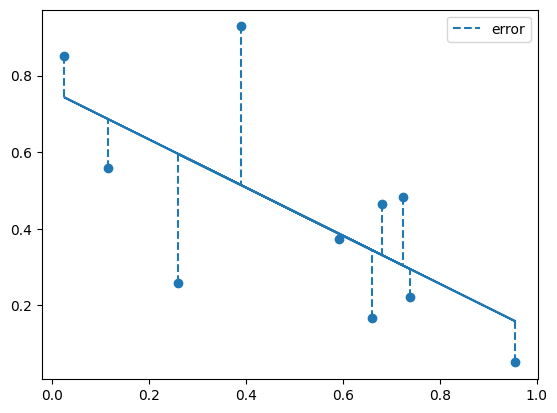

In [6]:
b1,b0 = np.polyfit(x, b, 1)
plt.scatter(x,b)
plt.plot(x, b1*x+b0)
plt.vlines(x, ymin = b, ymax = b1*x+b0, label = 'error', linestyle='dashed')
plt.legend()
plt.show()

### $L^1 - Regression$
* less sensitive to outliers than least squares regression

The L1 regression uses $L^1$ norm for regularization.

#### Transform to optimization problem: 

Objective function: $\min \varepsilon = \displaystyle \min_x b-Ax$

$L^1$ regression uses $L^1$-norm to find the vector $x$:
$$\displaystyle\min_x \|b-Ax|\|_1 = \min (\sum_{i=1}^n |b-Ax|)$$

which is equivalent to: 
$$
\begin{align*}
\displaystyle\min \sum_i t_i\\
\text{subject to} && t_i - |\mathbf{b}-\mathbf{Ax}| = 0 
\end{align*}
$$
and therefore we have:
$$
\begin{align*}
\displaystyle\min \sum_i t_i\\
\text{subject to} && -\mathbf{t}-\mathbf{Ax} \leq -\mathbf{b} \\
&& -\mathbf{t} + \mathbf{Ax} \leq \mathbf{b}
\end{align*}
$$


### Linear Algebra Review

Let $Ax = b$ and A be a $m \times n$

* case 1: m = n (square matrix)
    - unique solution: If matrix A is non-singular
    - infinitely many solution: If matrix A is singular and b $\in$ span(A)
    - no solution: If matrix A is singular and b $\notin$ span(A)
* case 2: m < n (underdetermined)
    - infinitely many solution: If matrix A is non-singular or matrix A is singular and b $\in$ span(A)
    - no solution: If matrix A is singular and b $\notin$ span(A)
* case 3: m > n (overdetermined)
    - unique solution: If matrix A is non-singular and b $\in$ span(A)
    - infinitely many solution: If matrix A is non-singular and b $\in$ span(A)
    - no solution: If matrix A is non-singular and b $\notin$ span(A) or If matrix A is singular and b $\notin$ span(A)


soure: MATH 307 notes

For linear optimization, we also have overdetermined and underdetermined systems. 

**Overdetermined systems:**

The matrix A has m > n, so there are more constraints than variables. This will most likely result in no solution, so there is little possibility that we have $\mathbf{b}=\mathbf{Ax}$. So, the goal is to minimize the error $\varepsilon$ to get the best fit line. 

**Underdetermined systems:**

The matrix has m < n, so there are more variables than constraints. It is likely to have infinitely many solutions. This is different than the previous explanations. The solution is unbounded if there are infinitely many solutions, so we need to have a way to select the feasible region to obtain an optimal solution instead of minimizing the error.

source: Math 441 notes

### $L^1$ regression application: Real estate price prediction

The dataset can be found from: https://statso.io/real-estate-prediction-case-study/

**1. Define the problem**

In [57]:
import pandas as pd

data = pd.read_csv('Real_Estate.csv')
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


Given the house age, distance to the MRT station, number of convenience stores, latitude, and longitude, find the best-fit line to get the approximate house price per unit area. 

**2. Identify the variables and parameters**

Variables: 

1. $x_1$: house age
2. $x_2$: distance to the nearest MRT station
3. $x_3$: nearest convenience stores
4. $x_4$: latitude
5. $x_5$: longitude
6. b = house price of unit area

Multiple Linear Regression:
$$
\mathbf{b} = Ax+ \varepsilon \\
\mathbf{b} = \beta_0 + \beta_1 \mathbf{x_1} + \beta_2 \mathbf{x_2} + \beta_3 \mathbf{x_3} + \beta_4 \mathbf{x_4} + \beta_5 \mathbf{x_5}+ \varepsilon \\
$$

**3. State the assumptions and constraints:**

Assumptions:

- let the data be divided into training and testing data by 0.8 and 0.2


In [58]:
x = data[['House age','Distance to the nearest MRT station','Number of convenience stores',	'Latitude',	'Longitude']]
y = data['House price of unit area']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

constraints:
$$-\mathbf{t}-\mathbf{Ax} \leq -\mathbf{b} \\
-\mathbf{t} + \mathbf{Ax} \leq \mathbf{b}$$


**4. Build the solution** (using scipy.linprog)

To find the coeefficient of each variables, we can form the matrix:

$$
\begin{bmatrix}
-\mathbf{A} & -\mathbf{I} \\
\mathbf{A} & -\mathbf{I} \\
\end{bmatrix}

\begin{bmatrix}
\mathbf{x} \\
\mathbf{t} \\
\end{bmatrix}
=
\begin{bmatrix}
-\mathbf{y} \\
\mathbf{y} \\
\end{bmatrix}

$$

The above is equivalent to computing $-\mathbf{Ax} -\mathbf{t} \leq -\mathbf{b} \text{ and } \mathbf{Ax} -\mathbf{t} \leq \mathbf{b}$. Then, using linear optimization solver, we can find the minimum $\sum_i t_i$ subject to the constraints. Obtaining the result.x (since I am using scipy.linprog), we can obtain a single array of the coefficients of the variables and the slack variables. 

In [69]:
### Identifying the features and the target of the data

x = data[['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']]
y = data['House price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(len(x_train))

331


Since we have five variables and 331 slack variables (from having 331 equations), then there should be 5 + 331 = 336 columns and 331*2 = 662 rows.

$$

\begin{bmatrix}

-a_{1,1} & \cdots & -a_{1,5} & -t_{1} & 0 & 0 & 0 \\
-a_{2,1} & \cdots & -a_{2,5} & \vdots & -t_{2} & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & 0 \\
-a_{331,1} & \cdots & -a_{331,5} & 0 & \cdots & 0 & -t_{331}\\
a_{334,1} & \cdots & a_{334,5} & -t_{1} & 0 & 0 & 0 \\
a_{335,1} & \cdots & a_{335,5} & \vdots & -t_{2} & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & 0 \\
a_{662,1} & \cdots & a_{551,5} & 0 & \cdots & 0 & -t_{331}\\

\end{bmatrix} 

$$

In [60]:
A = np.array(x_train)
N = len(x_train) # number of slack variables
y = np.array(y_train)

# set the matrix for the constraints:
eq1 = np.hstack((-A,-np.eye(N)))
eq2 = np.hstack((A,-np.eye(N)))
A = np.block([[eq1],[eq2]])
print(A.shape)

(662, 336)


In [61]:
# set the y matrix
y = np.hstack([-y,y]).reshape((2*N,1)) # reshape to 662 rows and 1 column

# set the objective function
t = np.ones(N)
# The sum of the slack variables and the number of variables
obj = np.hstack([np.zeros(5), t]).reshape((N+5))

# Since only the slack variables are bounded, then we have to define the bounds:
# There is no upper or lower bound for the x variables
bounds = [(None,None) for _ in range(5)] + [(0,None) for _ in range(N)]

# use scipy.linprog to solve
result = linprog(obj, A_ub = A, b_ub = y, bounds = bounds)

# We only want the result of the first 5 result.x because the rest are
# the coefficients of the slack variables
print(np.round(result.x[:5],3))

[ 2.5000e-02 -8.0000e-03  1.6250e+00  8.2637e+01 -1.6735e+01]


In [62]:
# check if the slack variables follow the bounds
check = True
for t in result.x[5:]:
    if (t < 0): check = False

print(True)

True


Since the slack variables follow the bound, then the answers make sense. Next, we will interpret the results of the coefficients of result.x[:5].

x = \['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude'\]

The five elements of the array are supposed to represent each of the x, so coefficient of house age is 0.025. The coefficient of the distance to the nearest MRT station is -0.0080, and so on...

We can compare the coefficients with other methods of computing such as using statsmodel.api to produce linear regression using least squares. 

In [63]:
import statsmodels.api as sm

X = sm.add_constant(x)
Y = data['House price of unit area']
reg = sm.OLS(Y,X).fit()
summary_table = reg.summary()
print(summary_table)

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.521
Model:                                  OLS   Adj. R-squared:                  0.516
Method:                       Least Squares   F-statistic:                     88.91
Date:                      Tue, 12 Mar 2024   Prob (F-statistic):           4.26e-63
Time:                              22:43:12   Log-Likelihood:                -1575.7
No. Observations:                       414   AIC:                             3163.
Df Residuals:                           408   BIC:                             3188.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

**5.Evaluation**

The coefficients seem to differ greatly using statsmodels.api. This might be because according to the summary_table, the value of the constant is very large and we haven't considered the constant in the previous constraint matrix. In order to take into account of the constant, we need to add column of 1's in front of the matrix A and add an additional variable. Then, the shape of the matrix should be (662,337)

In [71]:
A = np.array(x_train)
N = len(x_train) # number of slack variables
y = np.array(y_train)

# set the matrix for the constraints:
eq1 = np.hstack((-A,-np.eye(N)))
eq2 = np.hstack((A,-np.eye(N)))
A = np.block([[eq1],[eq2]])
one = np.ones(N*2).reshape((2*N,1))
A = np.hstack((one, A))
print(A.shape)

(662, 337)


Then, we can edit the previous code to set up the linprog problem:

In [72]:
# set the y matrix
y = np.hstack([-y,y]).reshape((2*N,1)) # reshape to 662 rows and 1 column

# set the objective function
t = np.ones(N)
# The sum of the slack variables and the number of variables
obj = np.hstack([np.zeros(6), t]).reshape((N+6))

# Since only the slack variables are bounded, then we have to define the bounds:
# There is no upper or lower bound for the x variables
bounds = [(None,None) for _ in range(6)] + [(0,None) for _ in range(N)]

# use scipy.linprog to solve
result = linprog(obj, A_ub = A, b_ub = y, bounds = bounds)

# We only want the result of the first 5 result.x because the rest are
# the coefficients of the slack variables
print(result.x[:6])

[-65.57171606   0.           0.           0.           0.
   0.        ]
